In [1]:
# import libaries and the data data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/LeeMorinUCF/QMB6358S22/main/demo_24_Classification/credit.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   status           1000 non-null   object
 10  others           1000 non-null   object
 11  residence        1000 non-null   int64 
 12  property         1000 non-null   object
 13  age              1000 non-null   int64 
 14  otherplans       1000 non-null   object
 15  housing          1000 non-null   object
 16  cards            1000 non-null   int64 
 17  job              1000 non-null   o

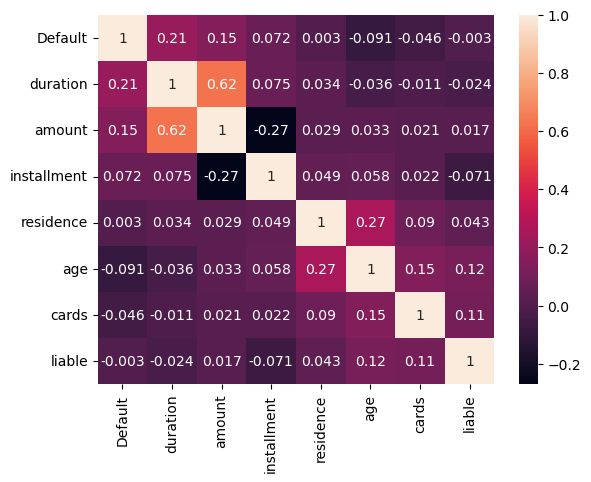

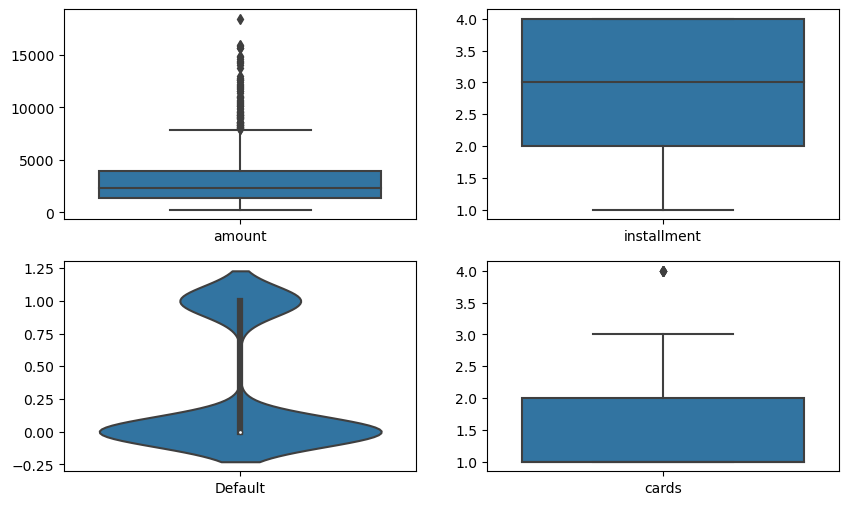

In [2]:
# Data exploration/descriptive statistics

df.info()

df.describe()
df.isna().sum()

df.nunique()

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), annot=True)


def count(df):
    plt__,axs2 = plt.subplots(2,2,figsize=(10,6))
    sns.boxplot(df[['amount']],ax=axs2[0,0])
    sns.boxplot(df[['installment']],ax=axs2[0,1])
    sns.violinplot(df[['Default']],ax=axs2[1,0])
    sns.boxplot(df[['cards']],ax=axs2[1,1])
    
    plt.show()


count(df)



In [3]:
# Setting the Dependent Variable to Default and then train/test split and model selection/preprocessing


X = df.drop('Default',axis=1)
y = df[['Default']]

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


from sklearn.linear_model import LogisticRegression



clf = LogisticRegression()


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()


from sklearn.tree import DecisionTreeClassifier

trees = DecisionTreeClassifier()

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [4]:
# since the dataset contains categorical features, onehotencoder is used
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


ohe = OneHotEncoder()


ct = make_column_transformer(
    (ohe,['employ','checkingstatus1','history','purpose','savings','status','others','property','otherplans','housing','job','tele','foreign']),remainder='passthrough')



ct.fit_transform(X)


array([[ 0.,  0.,  0., ..., 67.,  2.,  1.],
       [ 0.,  0.,  1., ..., 22.,  1.,  1.],
       [ 0.,  0.,  0., ..., 49.,  1.,  2.],
       ...,
       [ 0.,  0.,  0., ..., 38.,  1.,  1.],
       [ 0.,  0.,  1., ..., 23.,  1.,  1.],
       [ 1.,  0.,  0., ..., 27.,  1.,  1.]])

In [5]:
# now, the clasifiers used need to be ran through a pipeline. 

from sklearn.pipeline import make_pipeline

# pipeline for logistic regression
clf_pipe = make_pipeline(ct,clf).fit(X_train,y_train)

pipe_pred = clf_pipe.predict(X_test)

pipe_pred_prob = clf_pipe.predict_proba(X_test)[::,1]


# Pipeline for Random Forest

rfc_pipe = make_pipeline(ct,rfc).fit(X_train,y_train)
rfc_pred = rfc_pipe.predict(X_test)
rfc_pred_prob = rfc_pipe.predict_proba(X_test)[::,1]


#pipeline for Decision tree classifier

tree_pipe = make_pipeline(ct,trees).fit(X_train,y_train)
tree_pred = tree_pipe.predict(X_test)
tree_pred_prob = tree_pipe.predict_proba(X_test)[::,1]


# pipeline for Gradient Boost Classifier

gbc_pipe = make_pipeline(ct,gb).fit(X_train,y_train)
gbc_pred = gbc_pipe.predict(X_test)
gbc_pred_prob = gbc_pipe.predict_proba(X_test)[::,1]


# Naive Bayes Pipeline

nb_pipe = make_pipeline(ct,nb).fit(X_train,y_train)
nb_pred = nb_pipe.predict(X_test)
nb_pred_prob = nb_pipe.predict_proba(X_test)[::,1]


In [6]:
#Scoring will not be used to evaluate each model. The dependent variable is binary, so roc,accuracy score, F1 ect
from sklearn.metrics import accuracy_score,f1_score,roc_curve,roc_auc_score

def evaluate_model(model_name,y_true,y_pred,y_pred_prob):
    acc = accuracy_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred_prob)
    print(f'{model_name} - Accuracy: {acc * 100:.2f}%, ROC-AUC: {roc * 100:.2f}%')

evaluate_model('Logistic Regression', y_test,pipe_pred,pipe_pred_prob)
evaluate_model('Random Forest', y_test,rfc_pred,rfc_pred_prob)
evaluate_model('Naive Bayes', y_test,nb_pred,nb_pred_prob)
evaluate_model('Gradient Boosting',y_test,gbc_pred,gbc_pred_prob)


Logistic Regression - Accuracy: 76.50%, ROC-AUC: 79.47%
Random Forest - Accuracy: 78.50%, ROC-AUC: 81.76%
Naive Bayes - Accuracy: 73.00%, ROC-AUC: 77.45%
Gradient Boosting - Accuracy: 78.50%, ROC-AUC: 81.45%


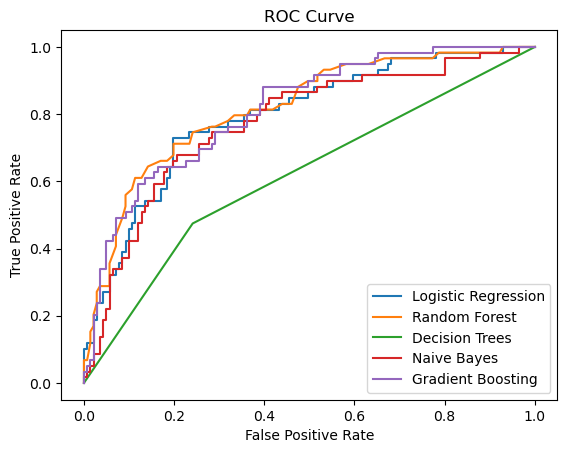

In [7]:
# User-Defined function to plot a roc curve for all models
def roc_curve_plot(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr,tpr,label=model_name)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

roc_curve_plot(y_test,pipe_pred_prob,'Logistic Regression')
roc_curve_plot(y_test,rfc_pred_prob,'Random Forest')
roc_curve_plot(y_test,tree_pred_prob,'Decision Trees')
roc_curve_plot(y_test,nb_pred_prob,'Naive Bayes')
roc_curve_plot(y_test,gbc_pred_prob,'Gradient Boosting')
plt.legend()
plt.show()